<a href="https://colab.research.google.com/github/LuisFerRosas/IA_2/blob/master/kmeans_sis_421_lab1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
!ls 'My Drive/Colab Notebooks/dataset_IA2'

bird_small.mat	ex7data2.mat  NotasUniversitarios.xlsx


In [13]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import sys
import pandas as pd


def findClosestCentroids(X, centroids):
    #FINDCLOSESTCENTROIDS calcula las membresías de centroide para cada ejemplo
    # idx = FINDCLOSESTCENTROIDS (X, centroides) devuelve los centroides más cercanos
    # en idx para un conjunto de datos X donde cada fila es un solo ejemplo. idx = m x 1
    # # vector de asignaciones de centroide (es decir, cada entrada en el rango [1..K]) 

    # Set K
    K = centroids.shape[0]

    # Debe devolver las siguientes variables correctamente.
    # de http://stackoverflow.com/a/24261734/583834
    # para evitar el error "las matrices utilizadas como índices deben ser de tipo entero (o booleano)"
    idx = np.zeros((X.shape[0], 1), dtype=np.int8)
    # ====================== SU CÓDIGO AQUÍ ======================
    # Instrucciones: Repase cada ejemplo, encuentre su centroide más cercano y almacene
    # el índice dentro de idx en la ubicación adecuada.
    #  Concretamente, idx (i) debe contener el índice del centroide
    # más cercano al ejemplo i. Por lo tanto, debería ser un valor en el
    # rango 1..K
    # # #
    # Nota: Puede usar un ciclo for sobre los ejemplos para calcular esto.
    # 

    # set m = # of training examples
    m = X.shape[0]

    # for cada ejemplo de entrenamiento
    for i in range(m):

        # for para cada centroide
        for j in range(K):

            # calcular la distancia euclidiana entre el ejemplo y el centroide
            difference = X[i,:]-centroids[j,:]
            distance = np.power(np.sqrt( difference.dot(difference.T ) ), 2)

            # if this is the first centroid, initialize the min_distance and min_centroid
            # OR 
            # if distance < min_distance, reassign min_distance=distance and min_centroid to current j
            # si este es el primer centroide, inicialice min_distance y min_centroid
            #  O
            #  if distance <min_distance, reasignar min_distance = distance y min_centroid a la corriente j
            if j == 0 or distance < min_distance:
              min_distance = distance
              min_centroid = j


        # asignar centroide para este ejemplo a uno correspondiente a min_distance 
        idx[i]= min_centroid

    return idx
def computeCentroids(X, idx, K):
    #COMPUTECENTROIDS devuelve los nuevos centroides calculando los medios de la
    #      # puntos de datos asignados a cada centroide.
    #      # centroids = COMPUTECENTROIDS (X, idx, K) devuelve los nuevos centroides por
    #      # calcular las medias de los puntos de datos asignados a cada centroide. Es
    #      # dado un conjunto de datos X donde cada fila es un único punto de datos, un vector
    #      # idx de asignaciones de centroide (es decir, cada entrada en el rango [1..K]) para cada
    #      # ejemplo, y K, el número de centroides. Deberías devolver una matriz
    #      # centroides, donde cada fila de centroides es la media de los puntos de datos
    #      # asignado a ella.
    #      # #
    
    # Variables útiles
    m, n = X.shape

    # Debe devolver las siguientes variables correctamente..
    centroids = np.zeros((K, n))
    # ====================== SU CÓDIGO AQUÍ ======================
    #      # Instrucciones: Repase cada centroide y calcule la media de todos los puntos que
    #      # pertenecer a ella. Concretamente, los centroides de vector de fila (i, :)
    #      # debe contener la media de los puntos de datos asignados a
    #      #      # centroide i.
    #      # #
    #      # Nota: Puede usar un bucle for sobre los centroides para calcular esto.
    #      # #

    # for each centroid
    for j in range(K):
    	
     # buscar índices de ejemplo de entrenamiento asignados al centroide actual
     #          # observe la indexación [0] - es necesario debido a los np.nonzero ()
     #          # salida de dos matrices
    	centroid_examples = np.nonzero(idx == j)[0]

    	# calcular media sobre todos los ejemplos de entrenamiento y reasignar centroide
    	centroids[j,:] = np.mean( X[centroid_examples,:], axis=0 )


    # =============================================================

    return centroids

def hsv(n=63):
    """
    adapted from Octave's (NOT matlab's) hsv(N) function
      which is equivalent to matlab's hsv2rgb([(0:N-1)'/N, ones(N,2)])
      from: http://octave.sourceforge.net/octave/function/hsv.html
            http://stackoverflow.com/q/23945764/583834
    """

    # return colors.hsv_to_rgb( np.column_stack([ np.array(range(n+1)).T / float(n), np.ones( ((n+1), 2) ) ]) )
    return colors.hsv_to_rgb( np.column_stack([ np.linspace(0, 1, n+1)            , np.ones( ((n+1), 2) ) ]) )


def plotDataPoints(X, idx, K):
    #PLOTDATAPOINTS traza puntos de datos en X, coloreándolos para que aquellos con el mismo
    # las asignaciones de índice en idx tienen el mismo color
    # PLOTDATAPOINTS (X, idx, K) traza puntos de datos en X, coloreándolos para que esos 
    # con las mismas asignaciones de índice en idx tienen el mismo color

    # Create palette (see hsv.py)
    palette = hsv( K )
    colors = np.array([palette[int(i)] for i in idx])

    # Graficar los datos
    plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors=colors)
    plt.show()
    return

def drawLine(p1, p2, **kwargs):
    #DRAWLINE Dibuja una línea desde el punto p1 al punto p2
    #  DRAWLINE (p1, p2) Dibuja una línea desde el punto p1 al punto p2 y mantiene el
    #  cifra actual

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], **kwargs)

def plotProgresskMeans(X, centroids, previous, idx, K, i):
    #PLOTPROGRESSKMEANS es una función auxiliar que muestra el progreso de
    # k-Significa que se está ejecutando. Está diseñado para usarse solo con datos 2D.
    # PLOTPROGRESSKMEANS (X, centroides, anterior, idx, K, i) traza los datos
    #  puntos con colores asignados a cada centroide. Con lo anterior
    #  centroides, también traza una línea entre las ubicaciones anteriores y
    #  ubicaciones actuales de los centroides.
    #

    # plt.hold(True)

    # Plot the examples
    plotDataPoints(X, idx, K)

    # Plot the centroids as black x's
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=400, c='k', linewidth=1)

    # Trace la historia de los centroides con líneas
    for j in range(centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :], c='b')

    # Title
    plt.title('Iteration number {:d}'.format(i+1))
    
    return
def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    #RUNKMEANS ejecuta el algoritmo K-Means en la matriz de datos X, donde cada fila de X
    # es un solo ejemplo
    # [centroids, idx] = RUNKMEANS (X, initial_centroids, max_iters, ...
    # plot_progress) ejecuta el algoritmo K-Means en la matriz de datos X, donde cada
    #  fila de X es un solo ejemplo. Utiliza initial_centroids utilizados como
    # centroides iniciales. max_iters especifica el número total de interacciones
    # de K-Means para ejecutar. plot_progress es un indicador verdadero / falso que
    # indica si la función también debe trazar su progreso como
    # el aprendizaje sucede. Esto se establece en falso de forma predeterminada. runkMeans devuelve
    #  centroides, una matriz Kxn de los centroides calculados e idx, a m x 1
    # vector de asignaciones de centroide (es decir, cada entrada en el rango [1..K])
    #

    # Establecer el valor predeterminado para el progreso de la trama
    #  (comentado debido a la asignación de parámetros por defecto pitónica arriba)
    # if not plot_progress:
    #     plot_progress = False

    # Graficar los datos si estamos trazando el progreso
    # if plot_progress:
    #     plt.hold(True)

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))

    # si traza, configure el espacio para gráficos interactivos
    # http://stackoverflow.com/a/4098938/583834
    # http://matplotlib.org/faq/usage_faq.html#what-is-interactive-mode
    if plot_progress:
        plt.close()
        plt.ion()

    # Run K-Means
    for i in range(max_iters):
        
        # Progreso de salida
        sys.stdout.write('\rK-Means iteration {:d}/{:d}...'.format(i+1, max_iters))
        sys.stdout.flush()
        
        # Para cada ejemplo en X, asígnelo al centroide más cercano.
        idx = findClosestCentroids(X, centroids)
        
        #Opcionalmente, trazar el progreso aquí
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            input('Press enter to continue.')
        
        # Dadas las membresías, calcule nuevos centroides
        centroids = computeCentroids(X, idx, K)

    # Espera si estamos tramando progreso
    print('\n')

    # if plot_progress:
    #     plt.hold(False)

    return centroids, idx
def kMeansInitCentroids(X, K):
    #KMEANSINITCENTROIDS Esta función inicializa K centroides que deben ser
    # used en K-Means en el conjunto de datos X
    # centroids = KMEANSINITCENTROIDS (X, K) devuelve K centroides iniciales para ser
    # utilizado con K-Means en el conjunto de datos X
    #

    # Debería devolver estos valores correctamente
    centroids = np.zeros((K, X.shape[1]))

    # ====================== SU CÓDIGO AQUÍ ======================
    # Instrucciones: debe establecer los centroides para ejemplos elegidos al azar de
    #  el conjunto de datos X
    #

    #Inicializar los centroides para que sean ejemplos aleatorios
    #Reordenar aleatoriamente los índices de ejemplos
    randidx = np.random.permutation(X.shape[0])
    #Tome los primeros ejemplos de K como centroides
    centroids = X[randidx[:K], :]

    # =============================================================

    return centroids


## ================= Parte 1: encontrar los centroides más cercanos ====================
# Para ayudarlo a implementar K-Means, hemos dividido el algoritmo de aprendizaje
# en dos funciones: findClosestCentroids y computeCentroids. En esto
# parte, debe completar el código en la función findClosestCentroids.


print('Encontrar los centroides más cercanos. \n')
# Cargue un conjunto de datos de ejemplo que usaremos

from os.path import dirname, join
#current_dir = dirname(__file__)
#file_path = join(current_dir, "./ex7data2.mat")

datos = pd.read_excel('My Drive/Colab Notebooks/dataset_IA2/NotasUniversitarios.xlsx')
df=pd.DataFrame(datos)
X=np.asarray(df.iloc[:,:8])
print(type(X))


# Seleccione un conjunto inicial de centroides
K = 5 # 3 Centroids
initial_centroids = np.array( [[93,83,72,68,54,37,26,8],
                               [96,82,78,62,57,39,28,5],
                               [99,84,78,64,55,37,24,4],
                               [94,84,75,65,59,32,26,15],
                               [98,88,76,69,55,38,29,10]] )

# Encuentre los centroides más cercanos para los ejemplos usando el
# centroides iniciales

idx = findClosestCentroids(X, initial_centroids)

print('Centroides más cercanos para los primeros 3 ejemplos: \n')
print(' {:s}'.format,idx[:5] )
# adjusted next string for python's 0-indexing
print('\n(los centroides más cercanos deben ser 0, 2, 1 respectivamente)\n')

input('Programa en pausa. Presione enter para continuar.')

Encontrar los centroides más cercanos. 

<class 'numpy.ndarray'>
Centroides más cercanos para los primeros 3 ejemplos: 

<built-in method format of str object at 0x7fee6d626a08> [[3]
 [0]
 [0]
 [0]
 [0]]

(los centroides más cercanos deben ser 0, 2, 1 respectivamente)

Programa en pausa. Presione enter para continuar.


''

In [14]:

## ===================== Parte 2: Calcular medias ====================== ===
# Después de implementar la función de centroides más cercana, ahora debería
# completa la función computeCentroids.
# #

print('\nCalcular centroides significa.\n')

# Calcular significa en función de los centroides más cercanos encontrados en la parte anterior.
centroids = computeCentroids(X, idx, K)


print('Centroides calculados después de la búsqueda inicial de los centroides más cercanos: \n')
print(' {:s} '.format,centroids)
print('\n(los centroides deberían ser\n')
print('   [ 2.428301 3.157924 ]\n')
print('   [ 5.813503 2.633656 ]\n')
print('   [ 7.119387 3.616684 ]\n\n')



input('Programa en pausa. Presione enter para continuar.')

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)



Calcular centroides significa.

Centroides calculados después de la búsqueda inicial de los centroides más cercanos: 

<built-in method format of str object at 0x7fee722ca618> [[43.87772926 49.13245997 37.86608443 62.94468705 35.75836972 61.80349345
  47.68850073 34.16885007]
 [59.37280702 44.45175439 71.6622807  27.85526316 56.15789474 68.11403509
  58.69736842 24.19298246]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]
 [49.70061457 52.52589991 53.29587357 45.43195786 59.38279192 38.88410887
  49.13608428 66.5856014 ]
 [80.93478261 85.34782609 66.30434783 74.60869565 39.2173913  75.97826087
  72.56521739 53.2173913 ]]

(los centroides deberían ser

   [ 2.428301 3.157924 ]

   [ 5.813503 2.633656 ]

   [ 7.119387 3.616684 ]


Programa en pausa. Presione enter para continuar.


''


 Ejecución de agrupación de K-Means en un conjunto de datos de ejemplo.


K-Means iteration 1/10...

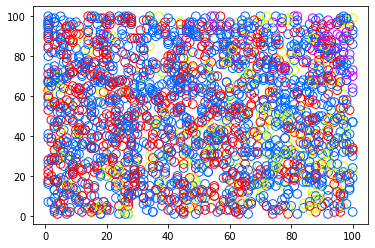

Press enter to continue.
K-Means iteration 2/10...

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


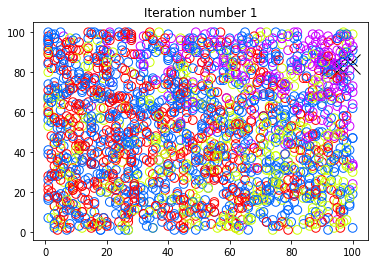

Press enter to continue.
K-Means iteration 3/10...

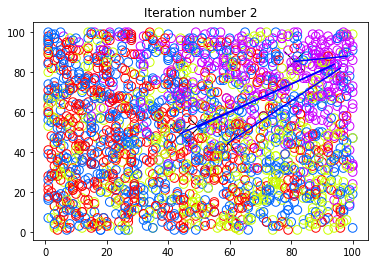

Press enter to continue.
K-Means iteration 4/10...

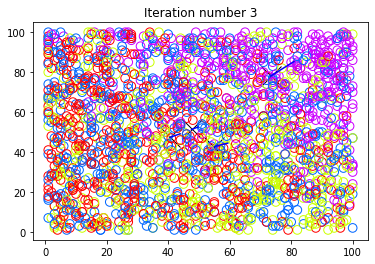

Press enter to continue.
K-Means iteration 5/10...

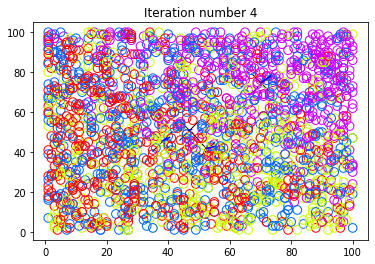

Press enter to continue.
K-Means iteration 6/10...

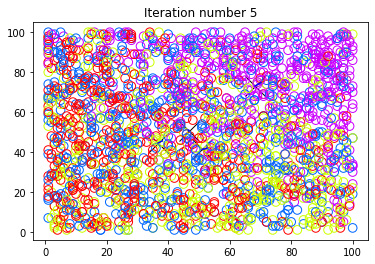

Press enter to continue.
K-Means iteration 7/10...

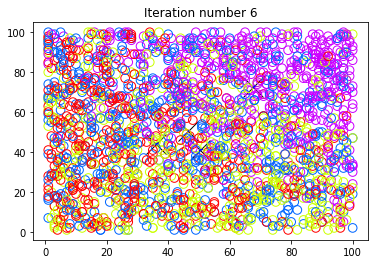

Press enter to continue.
K-Means iteration 8/10...

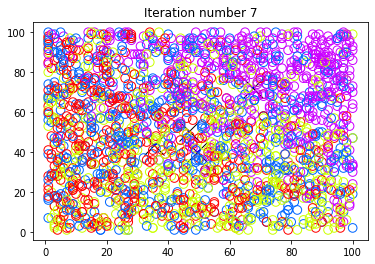

Press enter to continue.
K-Means iteration 9/10...

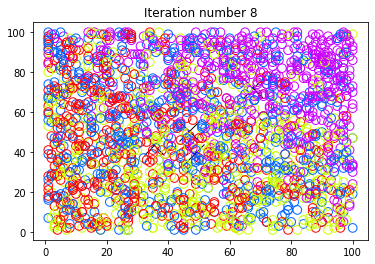

Press enter to continue.
K-Means iteration 10/10...

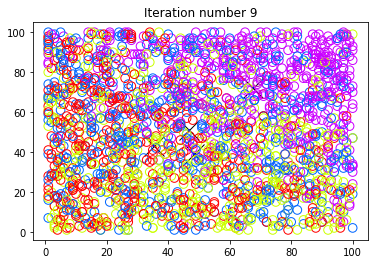

Press enter to continue.



K-Means Done.

Programa en pausa. Presione enter para continuar.


''

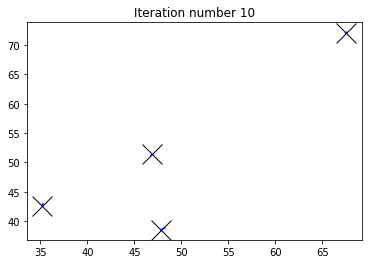

In [15]:

## =================== Parte 3: Agrupación de K-medias ======================
# Después de haber completado las dos funciones computeCentroids y
# findClosestCentroids, tienes todas las piezas necesarias para ejecutar el
# kMeans algoritmo. En esta parte, ejecutará el algoritmo K-Means en
# el conjunto de datos de ejemplo que hemos proporcionado.

print('\n Ejecución de agrupación de K-Means en un conjunto de datos de ejemplo.\n\n')

# Load an example dataset
datos = pd.read_excel('My Drive/Colab Notebooks/dataset_IA2/NotasUniversitarios.xlsx')
df=pd.DataFrame(datos)
X=np.asarray(df.iloc[:,:8])

# Settings for running K-Means
K = 5
max_iters = 10

# Por coherencia, aquí establecemos los centroides a valores específicos
# pero en la práctica desea generarlos automáticamente, como por
# los configura como ejemplos aleatorios (como se puede ver en
# kMeansInitCentroids).

initial_centroids = np.array( [[93,83,72,68,54,37,26,8],
                               [96,82,78,62,57,39,28,5],
                               [99,84,78,64,55,37,24,4],
                               [94,84,75,65,59,32,26,15],
                               [98,88,76,69,55,38,29,10]] )

# Ejecute el algoritmo K-Means. El "verdadero" al final le dice a nuestra función que trace
# el progreso de K-Means

centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

print('\nK-Means Done.\n')


input('Programa en pausa. Presione enter para continuar.')